<a href="https://colab.research.google.com/github/Neha-Pal/Machine_Learning-using-Python/blob/main/Prediction_of_Insurance_cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Data Collection

In [3]:
from google.colab import files
uploaded =  files.upload()

Saving insurance.csv to insurance.csv


In [4]:
insurence_data = pd.read_csv('insurance.csv')

In [5]:
insurence_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
insurence_data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [7]:
insurence_data.shape

(1338, 7)

In [8]:
insurence_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
insurence_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Categorical data:


*   sex
*   region
*   smoker





In [10]:
insurence_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-11-90fcbf69d0d3>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurence_data['age'])


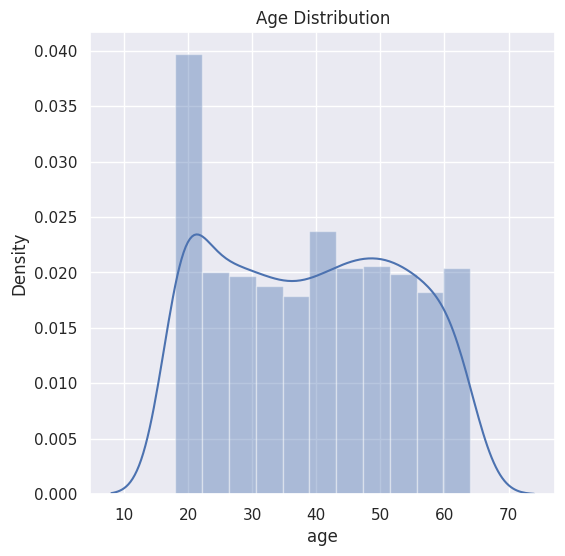

In [11]:
#distribution of age value
sns.set()
plt.figure(figsize = (6,6))
sns.distplot(insurence_data['age'])
plt.title('Age Distribution')
plt.show()

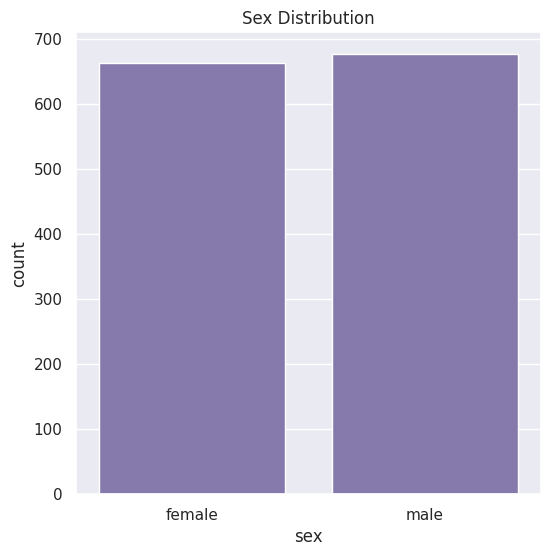

In [13]:
#Gender column
plt.figure(figsize = (6,6))
sns.countplot(x = 'sex' , data = insurence_data , color = 'm')
plt.title('Sex Distribution')
plt.show()

In [15]:
insurence_data['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

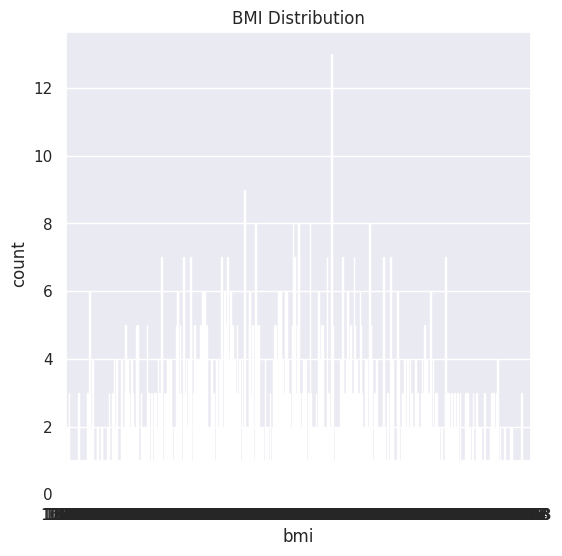

In [18]:
#BMI dictribution
plt.figure(figsize = (6,6))
sns.countplot(x = 'bmi' , data = insurence_data)
plt.title('BMI Distribution')
plt.show()

Normal BMI rabge -> 18.5 to 24.9

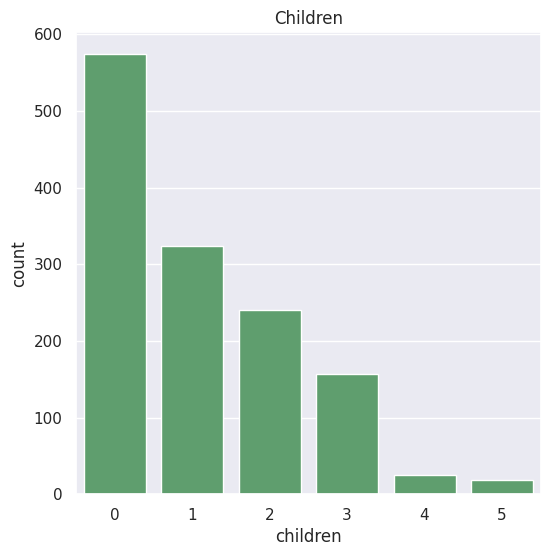

In [21]:
#children column
plt.figure(figsize = (6,6))
sns.countplot(x = 'children' , data = insurence_data , color = 'g')
plt.title('Children')
plt.show()

In [22]:
insurence_data['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

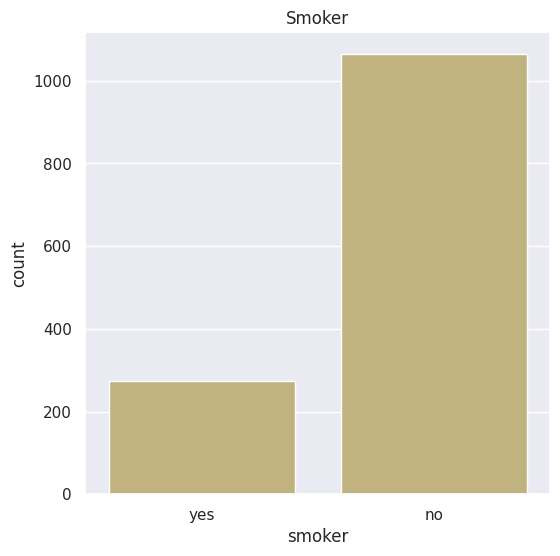

In [23]:
#Smoker column
plt.figure(figsize = (6,6))
sns.countplot(x = 'smoker' , data = insurence_data , color = 'y')
plt.title('Smoker')
plt.show()

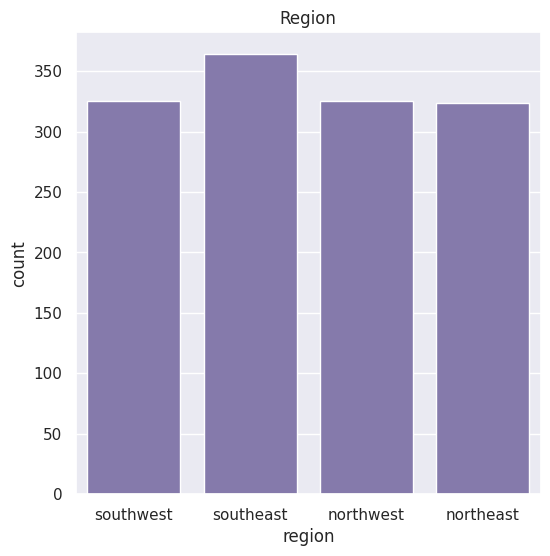

In [24]:
#Region column
plt.figure(figsize = (6,6))
sns.countplot(x = 'region' , data = insurence_data , color = 'm')
plt.title('Region')
plt.show()

In [25]:
insurence_data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

<ipython-input-31-76ac721c145f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurence_data['charges'])


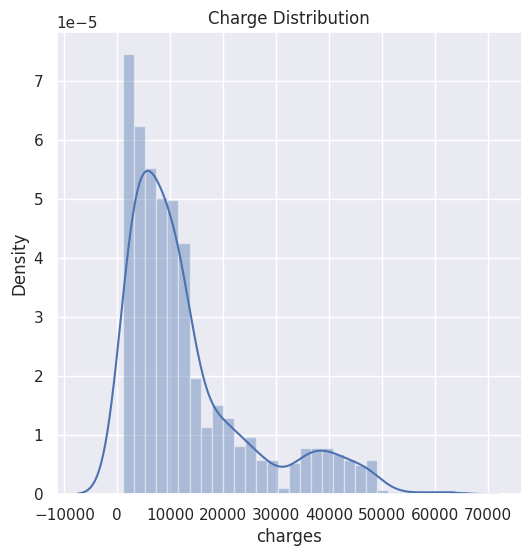

In [31]:
#Charges column
sns.set()
plt.figure(figsize = (6,6))
sns.distplot(insurence_data['charges'])
plt.title('Charge Distribution')
plt.show()

In [32]:
insurence_data['charges'].value_counts()

charges
1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: count, Length: 1337, dtype: int64

Data Preprocessing

In [33]:
#encoding sex column
insurence_data.replace({'sex': {'male':0 , 'female':1}},inplace = True)
#encoding smoker column
insurence_data.replace({'smoker': {'no':0 , 'yes':1}},inplace = True)
#encoding region column
insurence_data.replace({'region': {'southeast':0 , 'southwest':1 , 'northwest':2 , 'northeast':1 }},inplace = True)

In [49]:
insurence_data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,0,1725.55230
2,28,0,33.000,3,0,0,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520
5,31,1,25.740,0,0,0,3756.62160
6,46,1,33.440,1,0,0,8240.58960
7,37,1,27.740,3,0,2,7281.50560
8,37,0,29.830,2,0,1,6406.41070
9,60,1,25.840,0,0,2,28923.13692


Splitting the features and targets

In [35]:
x = insurence_data.drop(columns = 'charges',axis = 1)
y = insurence_data['charges']

In [36]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       1       1
1      18    0  33.770         1       0       0
2      28    0  33.000         3       0       0
3      33    0  22.705         0       0       2
4      32    0  28.880         0       0       2
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       0       2
1334   18    1  31.920         0       0       1
1335   18    1  36.850         0       0       0
1336   21    1  25.800         0       0       1
1337   61    1  29.070         0       1       2

[1338 rows x 6 columns]


In [37]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the data

In [38]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.3 , random_state = 2)

In [39]:
print(x.shape , x_train.shape , x_test.shape)

(1338, 6) (936, 6) (402, 6)


Model training

In [40]:
#linear regression
regressor = LinearRegression()

In [42]:
regressor.fit(x_train,y_train)

LinearRegression()

Model evaluation

In [43]:
training_data_prediction = regressor.predict(x_train)

r-squared value

In [45]:
r1 = metrics.r2_score(y_train , training_data_prediction)
print('R squared value:',r1)

R squared value: 0.7413193185625578


Prediction on Test Data

In [46]:
test_data_prediction = regressor.predict(x_test)

In [48]:
r2 = metrics.r2_score(y_test , test_data_prediction)
print('R squared value:',r2)

R squared value: 0.7652741836386532


Building a predictive system

In [50]:
input_data = (37,0,29.8,30,2.0,1)
as_array = np.asarray(input_data)
reshaped = as_array.reshape(1,-1)

In [52]:
prediction = regressor.predict(reshaped)
print('The insurence cost in USD:',prediction)

The insurence cost in USD: [72047.01195137]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
